In [1]:
import os
os.chdir('..')

In [3]:
import numpy as np
import scipy as sp
import datajoint as dj

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, tracking, psth
from pipeline.plot import unit_characteristic_plot

Connecting thinh@mesoscale-activity.datajoint.io:3306


# Retrieve a Session/Probe Insertion

In [5]:
ephys.ProbeInsertion & psth.UnitPsth

subject_id institution 6 digit animal ID,session session number,insertion_number,probe unique identifier for this model of probe (e.g. part number),electrode_config_name user friendly name
412330,15,1,15131808323,npx_first384
412330,15,2,15131808323,npx_first384
412753,41,1,15131808323,npx_first384
412753,41,2,15131808323,npx_first384
413950,20,1,15131808323,npx_first384
413950,20,2,15131808323,npx_first384
413950,21,1,15131808323,npx_first384


In [10]:
insertion_key = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 1}).fetch1('KEY')

In [11]:
insertion_key2 = (ephys.ProbeInsertion & {'session': 15, 'subject_id': 412330, 'insertion_number': 2}).fetch1('KEY')

In [74]:
print(insertion_key)

{'subject_id': 413950, 'session': 21, 'insertion_number': 1}


In [19]:
psth.UnitSelectivity & insertion_key

subject_id institution 6 digit animal ID,session session number,insertion_number,clustering_method,unit,unit_selectivity
412330,15,1,jrclust,7,contra-selective
412330,15,1,jrclust,8,contra-selective
412330,15,1,jrclust,12,contra-selective
412330,15,1,jrclust,18,contra-selective
412330,15,1,jrclust,33,contra-selective
412330,15,1,jrclust,34,non-selective
412330,15,1,jrclust,35,non-selective


# Plot Clustering Quality

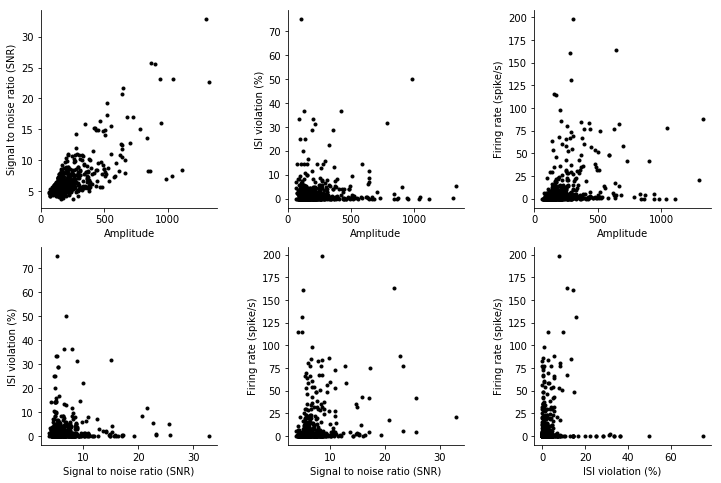

In [21]:
unit_characteristic_plot.plot_clustering_quality(insertion_key2)

# Plot unit characteristic - overlay on probe

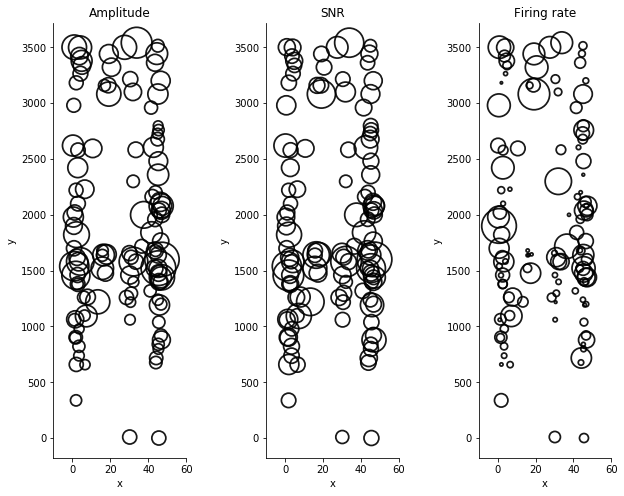

In [22]:
unit_characteristic_plot.plot_unit_characteristic(insertion_key2)

# Plot unit selectivity - overlay on probe

In [ ]:
unit_characteristic_plot.plot_unit_selectivity(insertion_key)

# Plot effect of bilateral perturbation - overlay on probe

In [ ]:
unit_characteristic_plot.plot_unit_bilateral_photostim_effect(insertion_key)

# Plot unit PSTHs categorized by selectivity

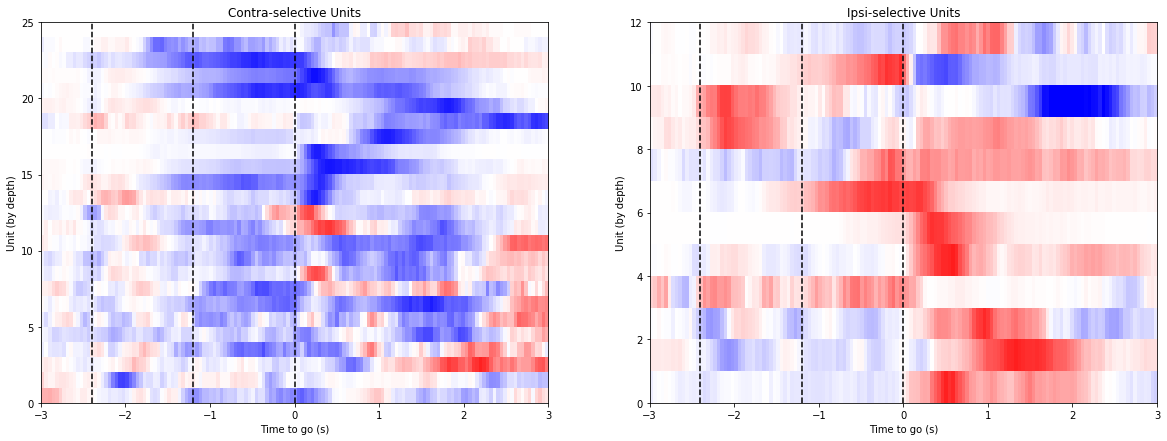

In [27]:
unit_characteristic_plot.plot_stacked_contra_ipsi_psth(insertion_key)

# Plot average PSTH categorized by selectivy

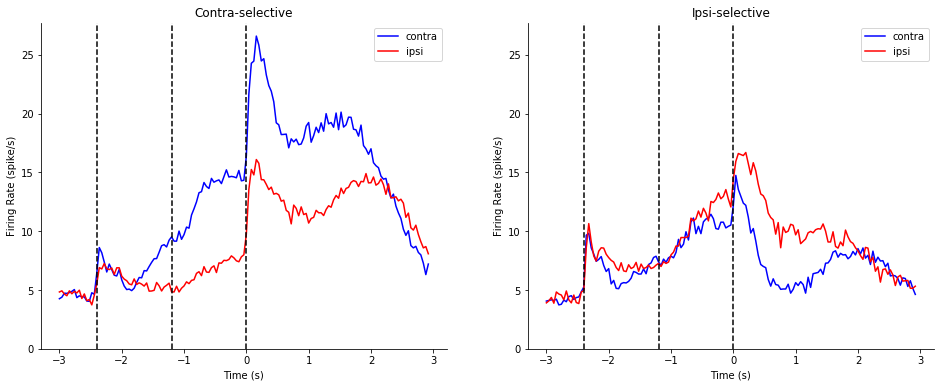

In [26]:
unit_characteristic_plot.plot_avg_contra_ipsi_psth(insertion_key)

# Plot average PSTH - effect of bilateral perturbation

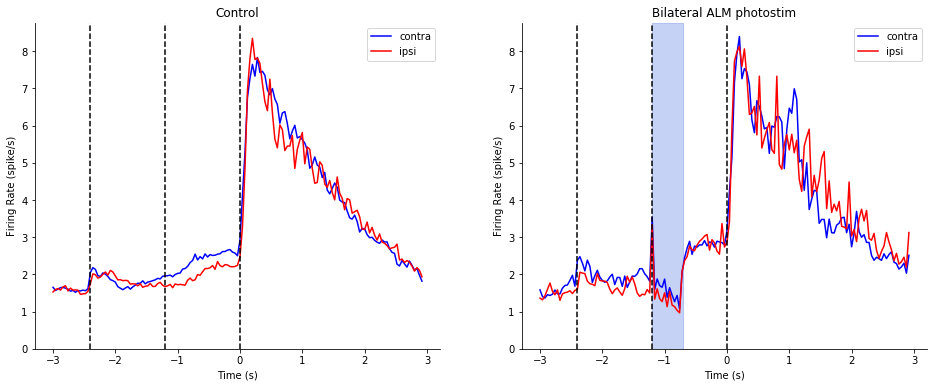

In [83]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(insertion_key)

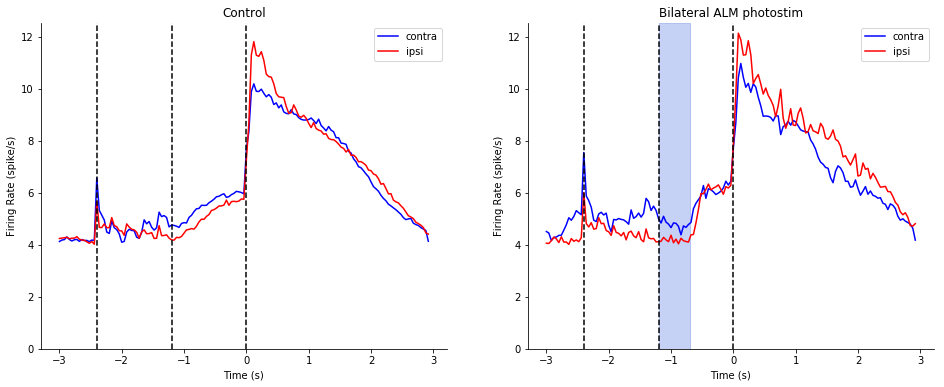

In [84]:
unit_characteristic_plot.plot_psth_bilateral_photostim_effect(insertion_key2)

# Plot trial psth projected on the coding direction vector

### CD vector is calculated for:
+ the specified **units**
+ the specified **time_period**

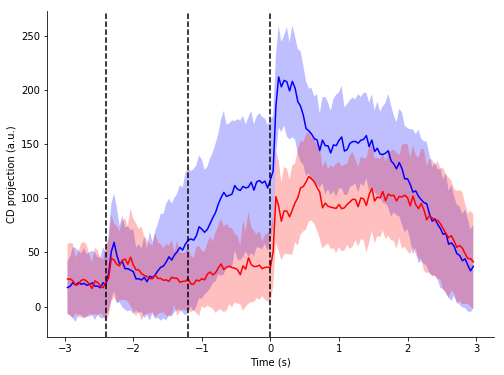

In [12]:
units = psth.UnitSelectivity & insertion_key & ephys.TrialSpikes & 'unit_selectivity != "non-selective"'
unit_characteristic_plot.plot_coding_direction(units,  time_period=(-0.4, 0))

### Plot trial-to-trial CD-endpoint correlation between two unit groups

In [18]:
units_1 = psth.UnitSelectivity & insertion_key & 'unit_selectivity != "non-selective"'
units_2 = psth.UnitSelectivity & insertion_key2 & 'unit_selectivity != "non-selective"'

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


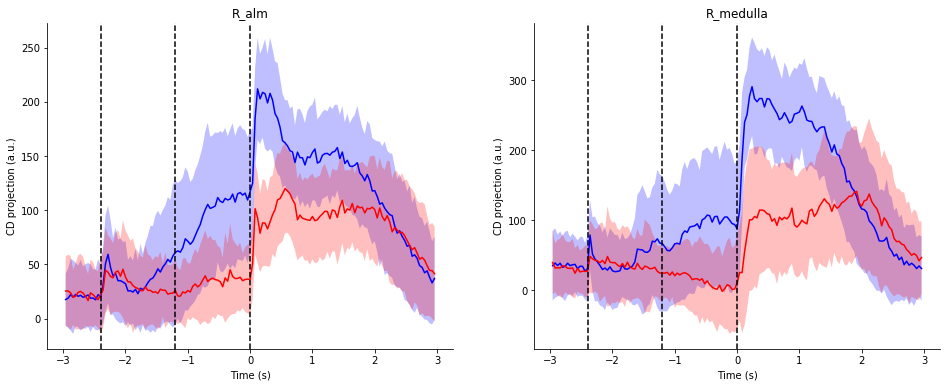

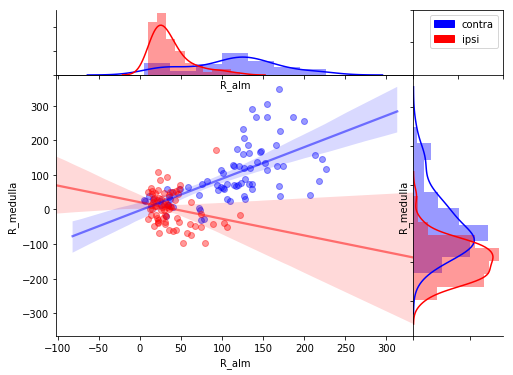

In [23]:
unit_characteristic_plot.plot_paired_coding_direction(units_1, units_2, labels=('R_alm', 'R_medulla'), time_period=(-0.4, 0))

# ==================================================

In [36]:
experiment.Session & tracking.Tracking()

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,20,2018-12-07,daveliu,RRig
